In [44]:
import pandas as pd
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [46]:
df.shape

(374, 13)

In [47]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [48]:
df_processed = df.drop(columns=['Person ID'])
df_processed.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [49]:
df_processed.duplicated().sum()


np.int64(242)

In [50]:
df_processed.drop_duplicates(inplace=True)
df_processed.info()
df_processed.head()


<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 366
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   132 non-null    object 
 1   Age                      132 non-null    int64  
 2   Occupation               132 non-null    object 
 3   Sleep Duration           132 non-null    float64
 4   Quality of Sleep         132 non-null    int64  
 5   Physical Activity Level  132 non-null    int64  
 6   Stress Level             132 non-null    int64  
 7   BMI Category             132 non-null    object 
 8   Blood Pressure           132 non-null    object 
 9   Heart Rate               132 non-null    int64  
 10  Daily Steps              132 non-null    int64  
 11  Sleep Disorder           59 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 13.4+ KB


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia


In [51]:
df_n = pd.DataFrame(df_processed)

numeric_df = df_n.select_dtypes(include=['number'])

numeric_df.fillna(numeric_df.median(), inplace=True)

numeric_df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,6.1,6,42,6,77,4200
1,28,6.2,6,60,8,75,10000
3,28,5.9,4,30,8,85,3000
5,28,5.9,4,30,8,85,3000
6,29,6.3,6,40,7,82,3500


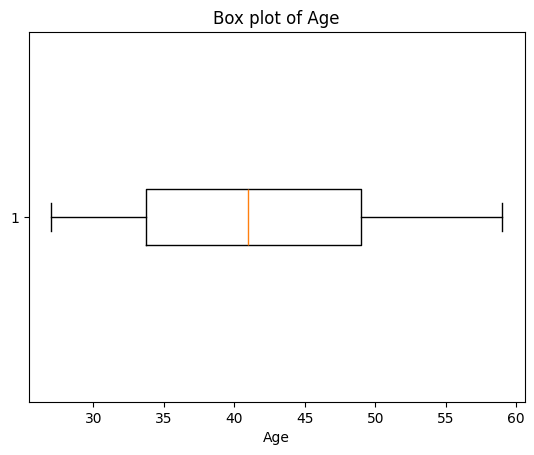

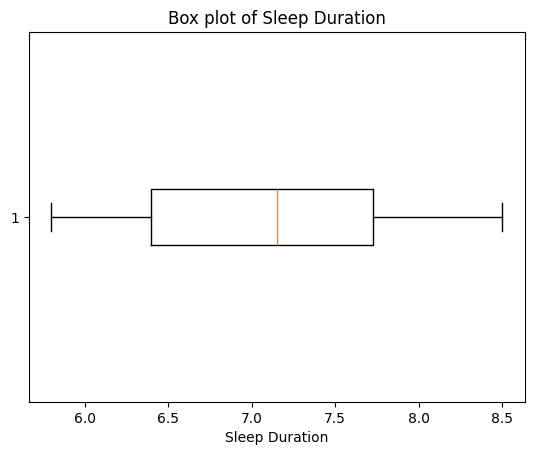

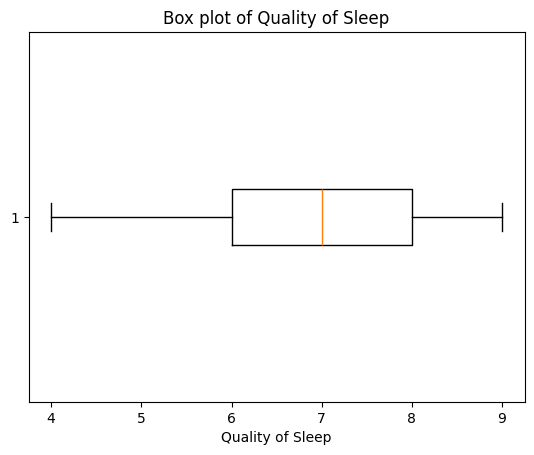

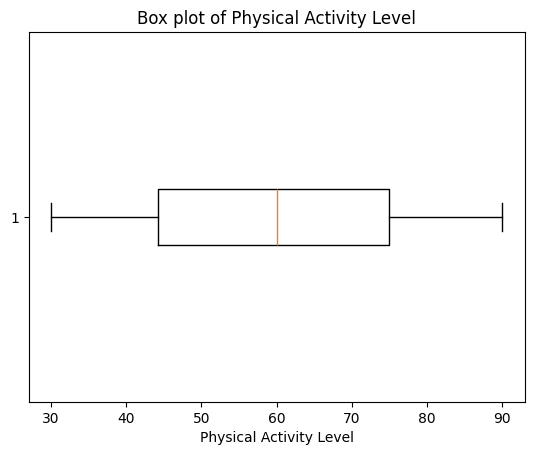

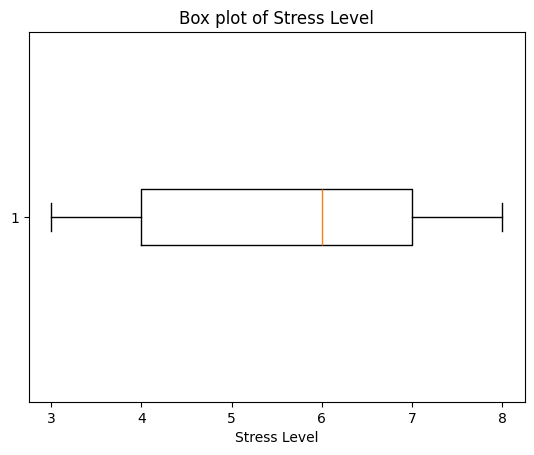

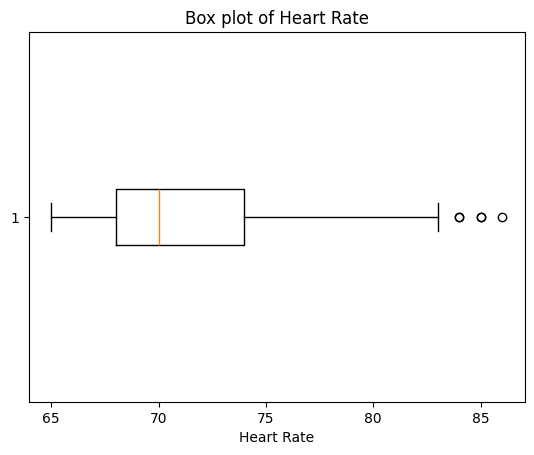

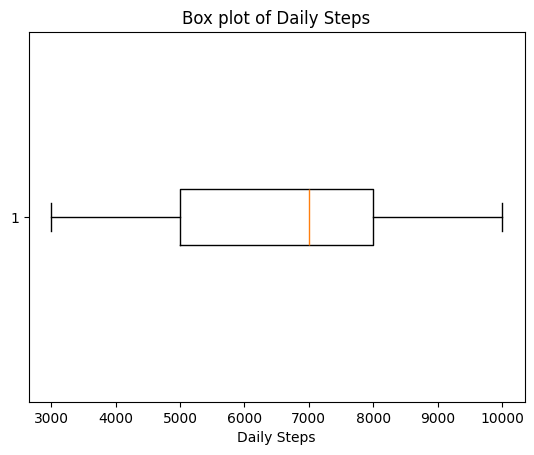

In [52]:
import matplotlib.pyplot as plt
for i,col in enumerate(numeric_df.columns):
    plt.boxplot(numeric_df[col], vert=False)
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

In [53]:
import numpy as np
#cleaned_sleep_df.info()
q1, q3 = np.percentile(df_processed['Heart Rate'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5* iqr
upper_bound = q3 +  1.5* iqr
cleaned_df = df_processed[(df_processed['Heart Rate'] >= lower_bound) & (df_processed['Heart Rate'] <= upper_bound)]
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 0 to 366
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   127 non-null    object 
 1   Age                      127 non-null    int64  
 2   Occupation               127 non-null    object 
 3   Sleep Duration           127 non-null    float64
 4   Quality of Sleep         127 non-null    int64  
 5   Physical Activity Level  127 non-null    int64  
 6   Stress Level             127 non-null    int64  
 7   BMI Category             127 non-null    object 
 8   Blood Pressure           127 non-null    object 
 9   Heart Rate               127 non-null    int64  
 10  Daily Steps              127 non-null    int64  
 11  Sleep Disorder           54 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 12.9+ KB


In [54]:
import numpy as np
q1, q3 = np.percentile(numeric_df['Sleep Duration'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
cleaned_df = numeric_df[(numeric_df['Sleep Duration'] < lower_bound) | (numeric_df['Sleep Duration'] > upper_bound)]
cleaned_df.describe()

Lower Bound: 4.412500000000001, Upper Bound: 9.712499999999999


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


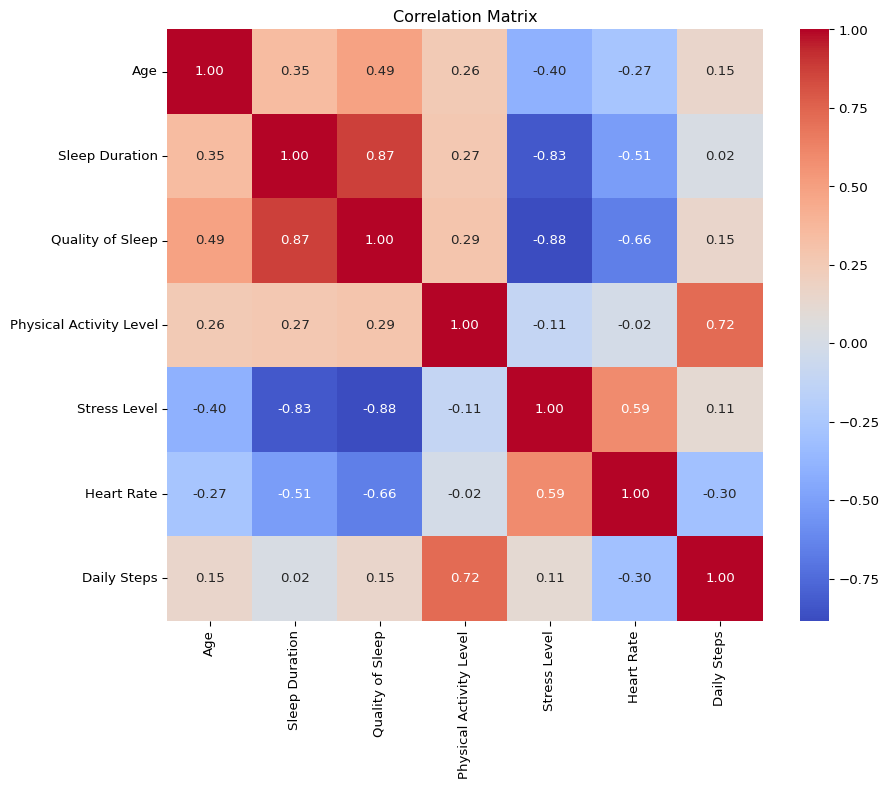

In [55]:
corr = numeric_df.corr()
import seaborn as sns

plt.figure(figsize=(10, 8), dpi=96)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()